#Exercise 1

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
import warnings
warnings.filterwarnings(action="ignore", category=FutureWarning)

In [2]:
# load mnist dataset
mnist = fetch_openml("mnist_784", version=1, as_frame=False)
print(mnist.data.shape)

(70000, 784)


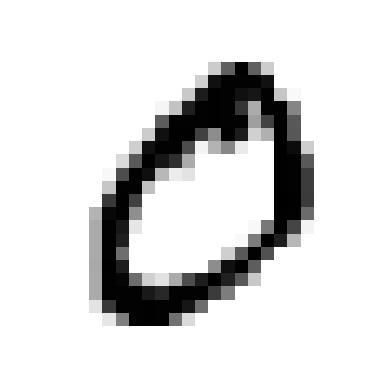

Label: 0


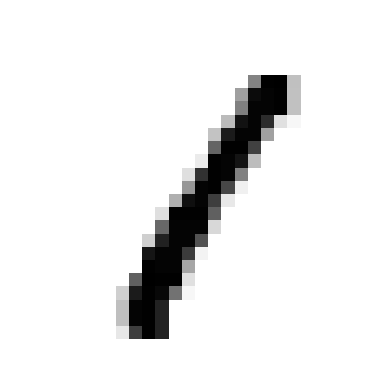

Label: 1


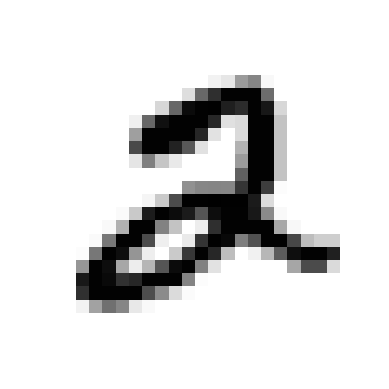

Label: 2


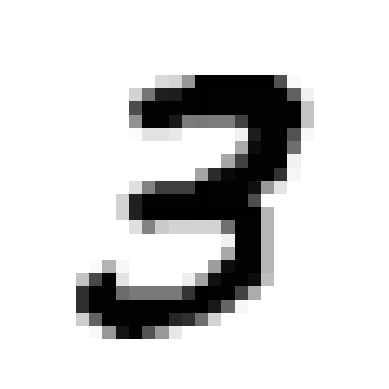

Label: 3


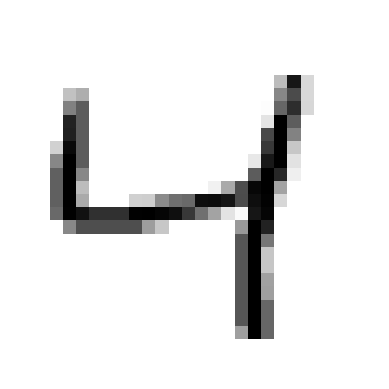

Label: 4


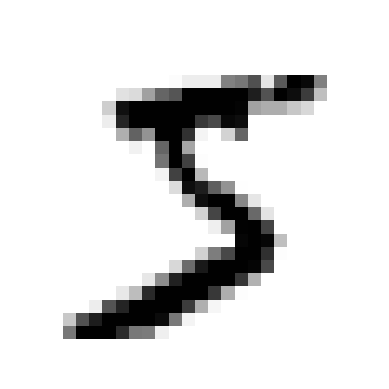

Label: 5


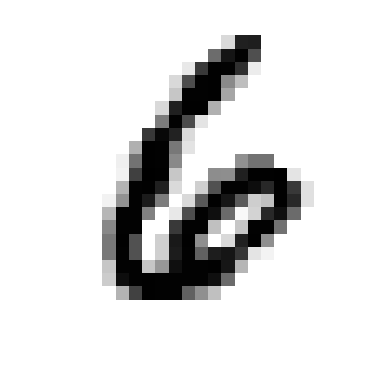

Label: 6


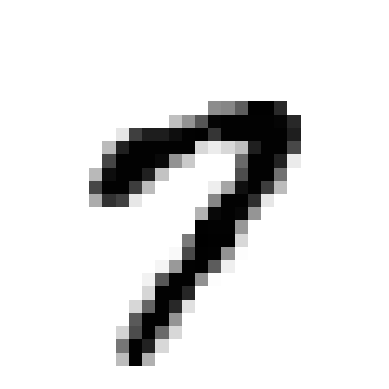

Label: 7


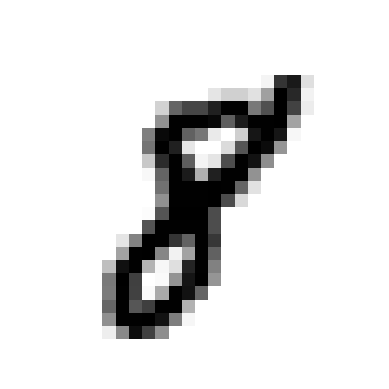

Label: 8


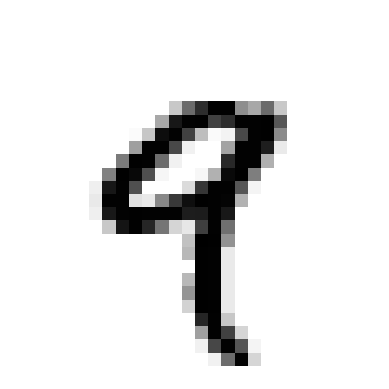

Label: 9


In [3]:
# get data, get unique digits for print
X, y = mnist.data, mnist.target
unique_digits = np.unique(y)

# Define a function to display a digit
def display_digit(digit_data):
    digit_image = digit_data.reshape(28, 28)
    plt.imshow(digit_image, cmap=plt.cm.gray_r)
    plt.axis("off")
    plt.show()

# Display each digit
for digit in unique_digits:
    index = np.where(y == digit)[0][0]
    display_digit(X[index])
    print(f"Label: {y[index]}")

In [4]:
# split the dataset into train and test set
X_train, y_train = mnist.data[:60000], mnist.target[:60000]
X_test, y_test = mnist.data[60000:], mnist.target[60000:]

# remove 0 data
train_filter = np.where(X_train != 0)

# create and fit the pca instance
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

# cumulative sum of explained variance
print(f"Cumsum: {np.cumsum(pca.explained_variance_ratio_)}")

Cumsum: [0.09704664 0.16800588]


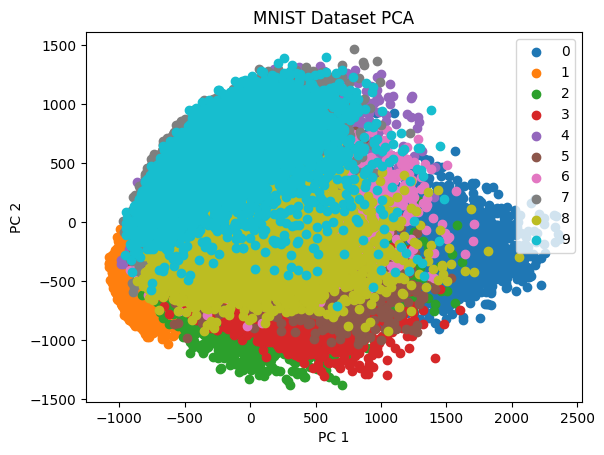

In [5]:
# plot the principal components
for digit in unique_digits:
    plt.scatter(X_pca[y_train == digit, 0], X_pca[y_train == digit, 1], label=str(digit))
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend()
plt.title("MNIST Dataset PCA")
plt.show()

In [6]:
# create and fit the ipca instance
ipca = IncrementalPCA(n_components=154)

n_batches = 100
for X_batch in np.array_split(X_train, n_batches):
    ipca.partial_fit(X_batch)

X_reduced = ipca.transform(X_train)
print(X_reduced.data.shape)
X_recovered = ipca.inverse_transform(X_reduced)
print(X_recovered.data.shape)

(60000, 154)
(60000, 784)


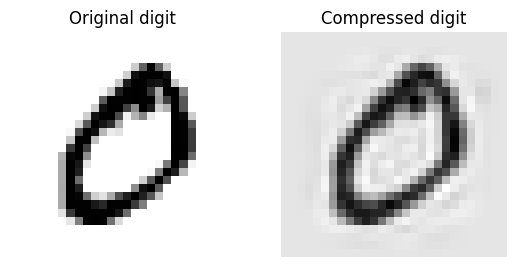

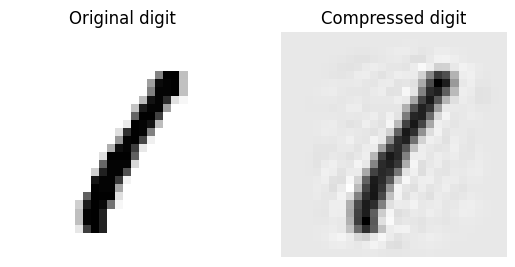

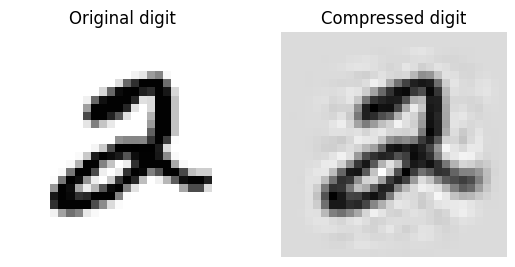

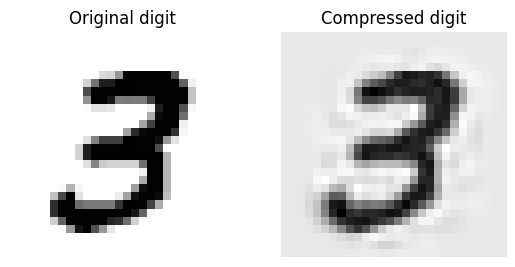

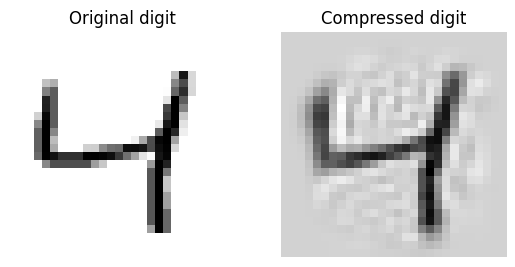

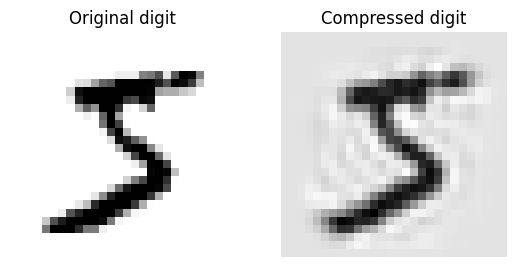

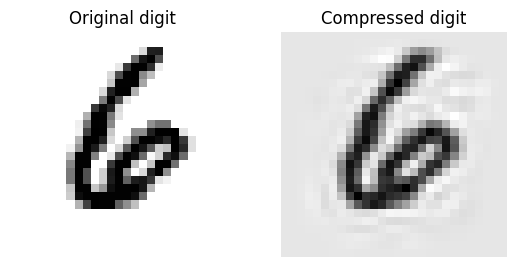

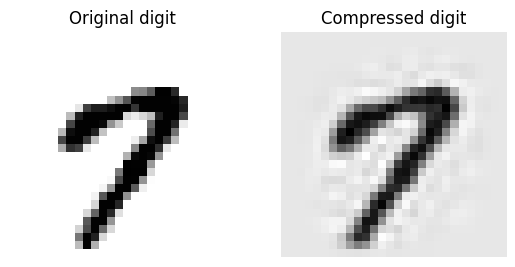

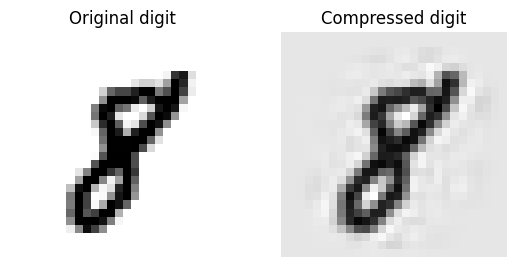

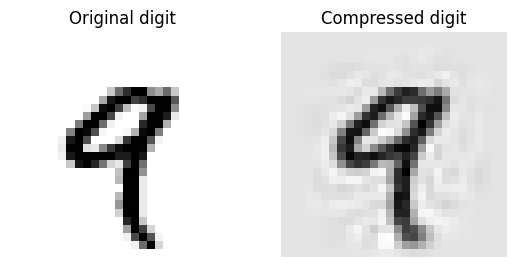

In [7]:
for digit in unique_digits:
    index = np.where(y == digit)[0][0]

    original_digit = X[index].reshape(28, 28)
    plt.subplot(1, 2, 1)
    plt.imshow(original_digit, cmap=plt.cm.gray_r)
    plt.title("Original digit")
    plt.axis("off")

    compressed_digit = X_recovered[index].reshape(28, 28)
    plt.subplot(1, 2, 2)
    plt.imshow(compressed_digit, cmap=plt.cm.gray_r)
    plt.title("Compressed digit")
    plt.axis("off")
    plt.show()